### Función explicada para crear un dataframe con datos aleatorios y luego mostrarlos en un grafico con Dash

In [1]:
import random
import pandas as pd
from datetime import datetime

In [2]:
### Para no usar datos de la base arme este script que crea un dataframe
### Con 10.000 filas en dos columnas
### Cree aleatoriamente 10 procesos para asignarles información
### En la primer columna del dataframe se crean 1000 registros para cada uno de los 10 procesos aleatorios que cree
### Y en la segunda columna 1000 fechas aleatorias formato %Y-%m-%d para cada uno de los 10 procesos
### Y despues cuento cuantas veces se repitio cada fecha para cada proceso y le agrego un contador
### finalizo eliminando los duplicados.
### De esta forma me queda armado un dataframe aleatorio que puede simular ventas por proceso.
### Ej: El proceso1 vendio 12 unidades el 2019-03-22

inicio = datetime(2018, 1, 1)
final =  datetime(2019, 3, 21)

datos = []

for i in range (0, 10000):
    fechaRandom = inicio + (final - inicio) * random.random() 
    datos.append(fechaRandom.strftime('%Y-%m-%d %H'))

df = pd.DataFrame(datos)
df.rename(columns={0: "Fecha"}, inplace=True)
procesos = []

for a in range (1, 11):
    procesos.append('Proceso' + str(a))

total = 0

proceso = []

for i in range (0, 10):
    for j in range ( 0, 1000):
        proceso.append(procesos[total])
    total += 1

datosProceso = pd.DataFrame(proceso)
datosProceso.rename(index=str, columns={0: "Proceso"}, inplace=True)
result = pd.merge(datosProceso.reset_index(),
                  df.reset_index(),
                  left_index=True, 
                  right_index=True)

resultInicial = len(result)

result = result.drop(columns={'index_x', 'index_y'})
result = result.groupby(['Proceso', 'Fecha']).size().reset_index(name='contador')

resultFinal = len(result)

resto = resultInicial - resultFinal

result.head()

,Proceso,Fecha,contador
0,Proceso1,2018-01-01 08,1
1,Proceso1,2018-01-01 20,1
2,Proceso1,2018-01-02 09,1
3,Proceso1,2018-01-03 04,1
4,Proceso1,2018-01-03 11,1


In [3]:
print('Inicie el Dataframe con %d y termine con %d por \
lo que se eliminaron un total de %d registros' % (resultInicial, resultFinal, resto))

Inicie el Dataframe con 10000 y termine con 9575 por lo que se eliminaron un total de 425 registros


In [4]:
### Lo guardo en excel por si lo llego a necesitar dsp
result.to_excel('dfAleatorio.xlsx')

In [5]:
### Ahora voy a crear la variable x e y para usarla en un grafico
### Para empezar guardo los procesos en un dataframe
procesosDf = pd.DataFrame(procesos)
procesosDf.rename(columns= {0 : "Procesos"}, inplace = True)
procesosDf.head(2)

,Procesos
0,Proceso1
1,Proceso2


In [6]:
### Creo las variables
x = []
y = []

In [7]:
### Relleno x
### Creo un dataframe con todas las fechas en la posicion i del dataframe de procesos creado anteriormente
### Luego a x le pusheo un array con el proceso en la posicion i
### Luego la posicion [i][1] (el array que acabo de pushear a x[i]) le pusheo todas las fechas que corresponden a ese proceso
for i in range (0, 10):
    fechaProceso = pd.DataFrame(result.Fecha[result.Proceso == procesosDf.Procesos[i]])
    fechaProceso = fechaProceso.reset_index()
    fechaProceso = fechaProceso.drop(columns = 'index')
    x.append([procesosDf.Procesos[i]])
    x[i].append([])
    for j in range (0, len(fechaProceso)):
        x[i][1].append(fechaProceso.Fecha[j])

In [8]:
#### La x ahora es una lista con cada uno de los 10 procesos con las fechas asociadas a cada uno de esos proceso
### Ej: ['Proceso1', ['2018-01-01','2018-01-02'...]], ['Proceso2', ['2018-01-01','2018-01-02'...]] ETC

In [9]:
### Relleno y
### Lo mismo que para x pero en vez de pushear las fechas pusheo el contador de las veces que se repitio cada una de las fechas

for i in range (0, 10):
    countProceso = pd.DataFrame(result.contador[result.Proceso == procesosDf.Procesos[i]])
    countProceso = countProceso.reset_index()
    countProceso = countProceso.drop(columns = 'index')
    y.append([procesosDf.Procesos[i]])
    y[i].append([])
    for j in range (0, len(countProceso)):
        y[i][1].append(countProceso.contador[j]) 

In [10]:
#### La y ahora es una lista con cada uno de los 10 procesos con los totales por fecha asociadas a cada uno de esos proceso
### Ej: ['Proceso1', [2,1 ...]], ['Proceso2', [3, 2...]] ETC

In [11]:
from IPython.display import Image

In [12]:
### Ahora con x e y armados ya puedo graficar. La info se maneja como muestra la imagen

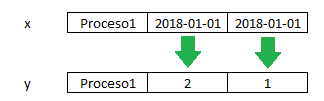

In [13]:
Image(filename= 'a1.png', width=350, height=125)

In [14]:
### Grafica usando Dash

proceso = 'Todos los procesos asociados'

import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()

app.layout = html.Div(children = [
    html.H1(proceso),
    dcc.Graph(id= 'Grafico' ,
             figure = {
                 # x[i][0] es el nombre del proceso
                 # x[i][1] son las fechas asociadas a ese proceso
                 # x[i][2] son los totales de veces que se repitio esa fecha para ese proceso
                'data' :[
                    {'x' : x[0][1], 'y': y[0][1], 'type':'bar', 'name': x[0][0]},
                    {'x' : x[1][1], 'y': y[1][1], 'type':'bar', 'name': x[1][0]},
                    {'x' : x[2][1], 'y': y[2][1], 'type':'bar', 'name': x[2][0]},
                    {'x' : x[3][1], 'y': y[3][1], 'type':'bar', 'name': x[3][0]},
                    {'x' : x[4][1], 'y': y[4][1], 'type':'bar', 'name': x[4][0]},
                    {'x' : x[5][1], 'y': y[5][1], 'type':'bar', 'name': x[5][0]},
                    {'x' : x[6][1], 'y': y[6][1], 'type':'bar', 'name': x[6][0]},
                    {'x' : x[7][1], 'y': y[7][1], 'type':'bar', 'name': x[7][0]},
                    {'x' : x[8][1], 'y': y[8][1], 'type':'bar', 'name': x[8][0]},
                    {'x' : x[9][1], 'y': y[9][1], 'type':'bar', 'name': x[9][0]},
                ],
                 'layout' : {
                     'title':'Datos'
                 }
             })
])

### Para ver la grafica descomentar estas dos lineas al ejecutar
### Si no las comento y se inicia no se ejecutan las lineas de abajo donde 
### muestro como funciona en imagenes hasta que se cierre la app

### if __name__ == '__main__':
###     app.run_server(debug = False)

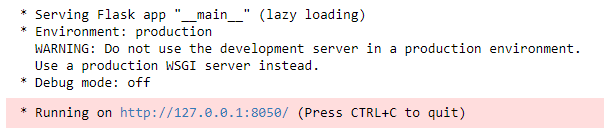

In [15]:
### Ejecutado el código de la celda anterior comienza a corer la aplicacion en localhost en un puerto designado
### Al dar click a esa direccion se vera la grafica
Image(filename= '0a.png', width=600, height=125)

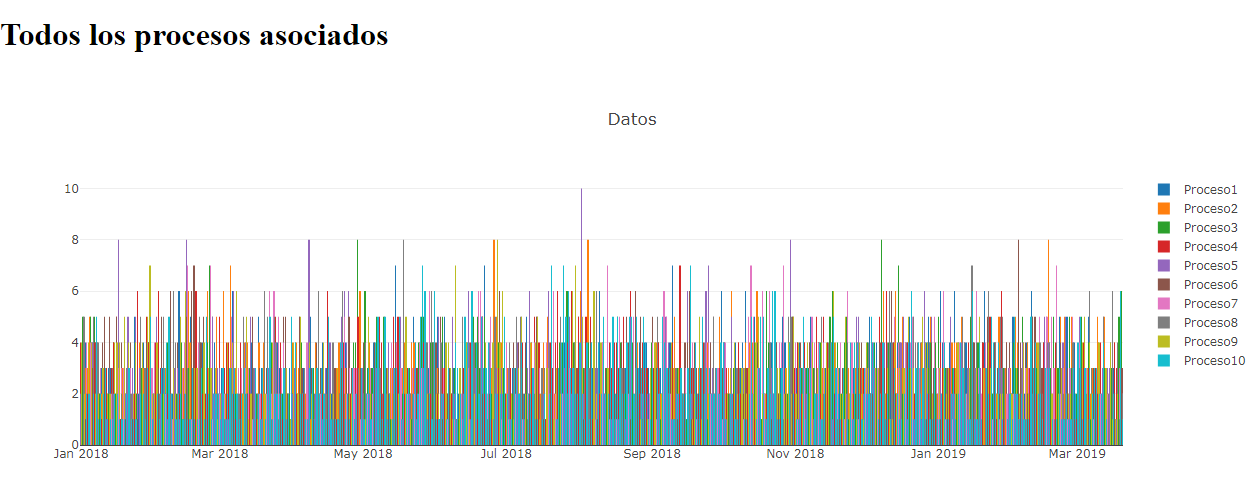

In [16]:
### Grafica con todos los datos de los 10 procesos desde el inicio que se seteo al fin
### inicio = datetime(2018, 1, 1)
### final =  datetime(2019, 3, 21)
Image(filename= '2a.png', width=950)

### Se puede seleccionar un rango para hacer zoom y analizar esa info

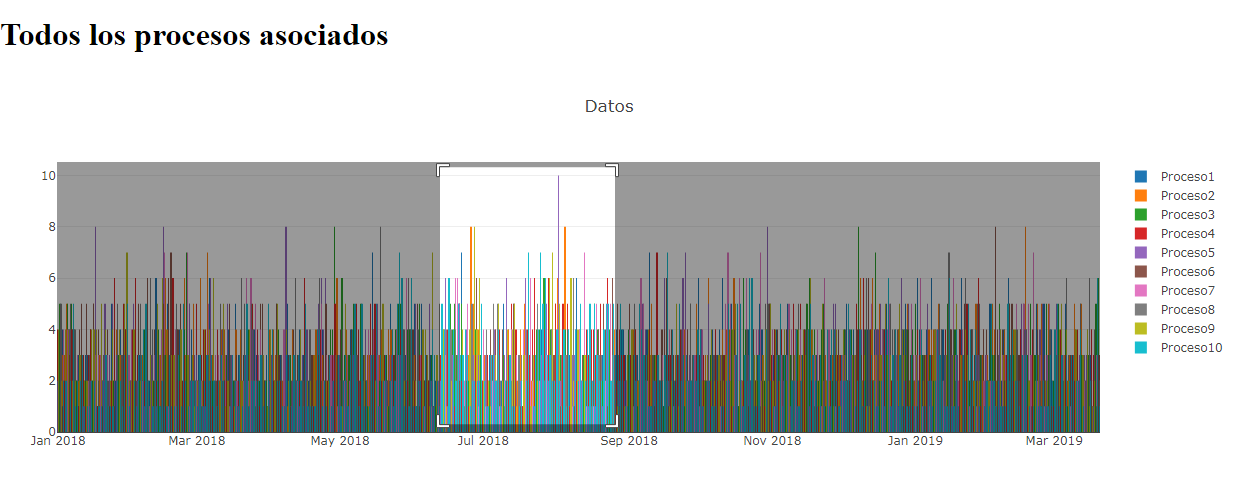

In [17]:
Image(filename= '3a.png', width=950)

### Veo la información del filtro anterior y puedo volver a achicar la info seleccionando nuevos rango

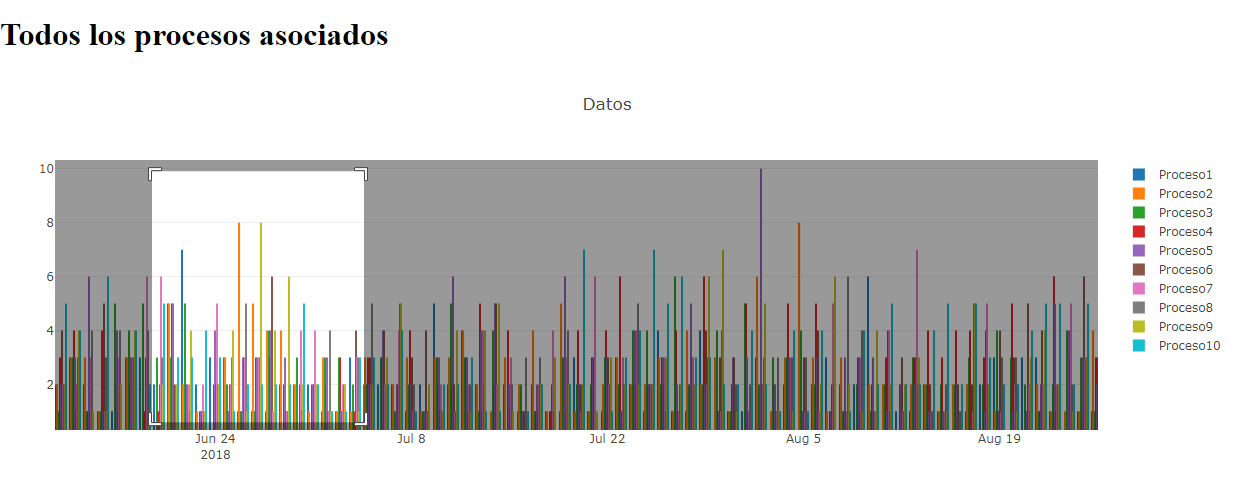

In [18]:
Image(filename= '4a.png', width=950)

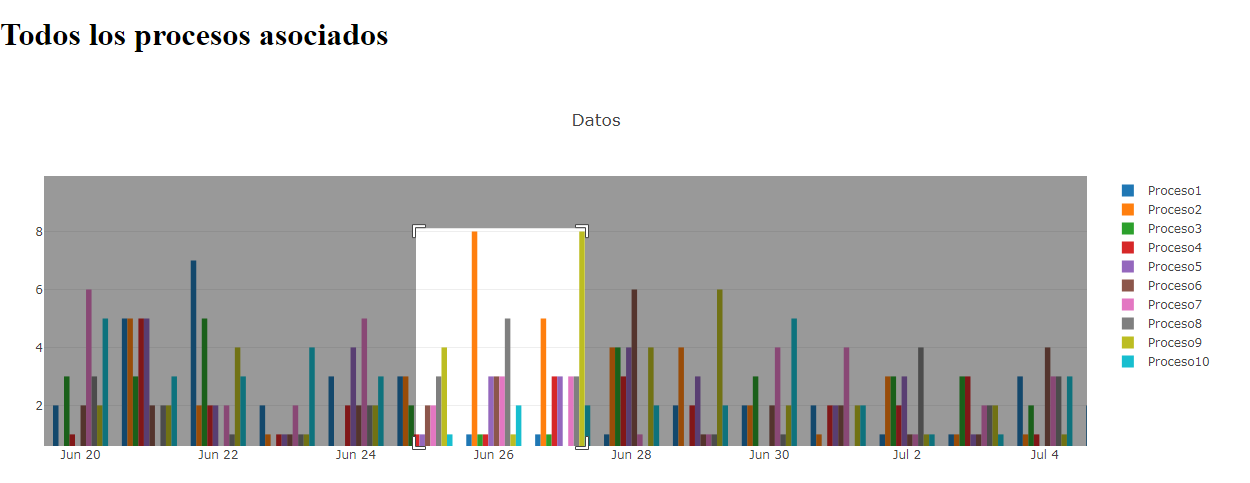

In [19]:
Image(filename= '5a.png', width=950)

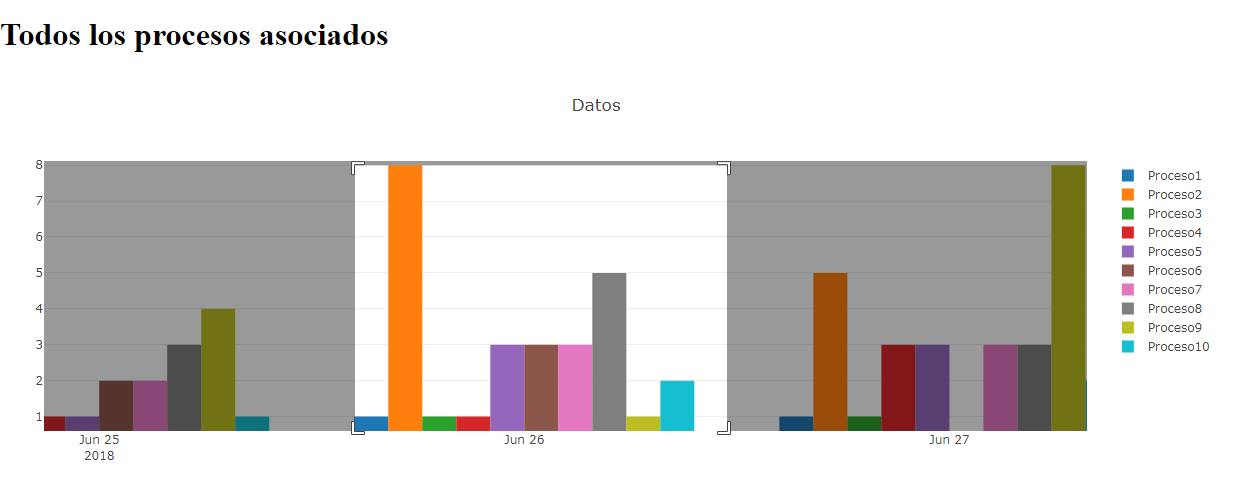

In [20]:
Image(filename= '6a.png', width=950)

### Puedo destildar procesos y ver solo los que quiero. Ahora en base al analisis puedo determinar que el 26 de jun del 2018 el proceso2 vendio 8 unidades,  el proceso8 vendio 5 y el proceso10 vendio 2

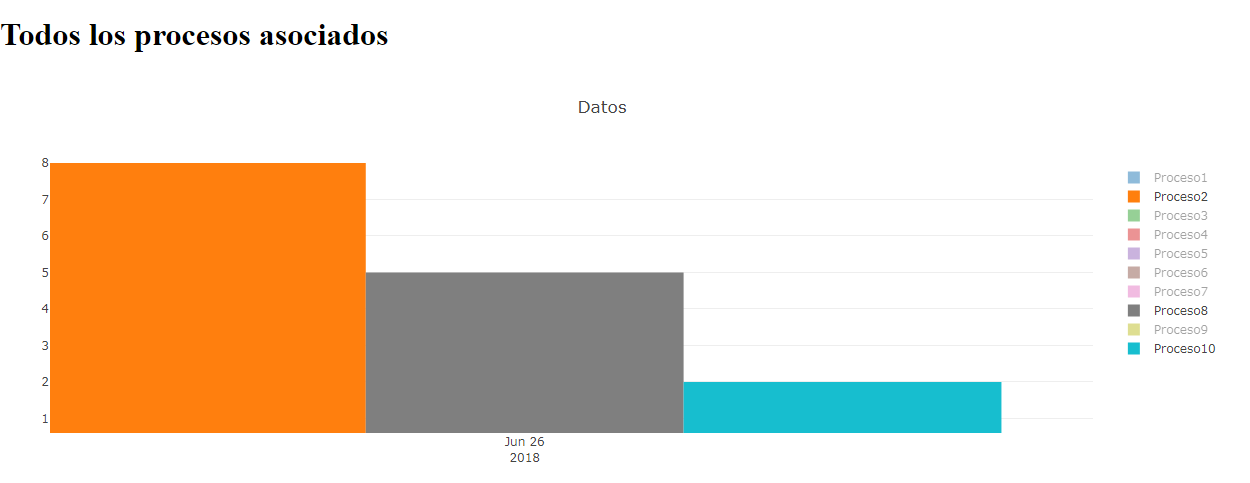

In [21]:
Image(filename= '7a.png', width=950)

<p style="font-size: 18px">Si en el comienzo del script (el que crea el dataframe con la info) hubiera cambiado el formato de la fecha y hubiera puesto Horas de esta forma -> <span style="font-size: 20px; font-weight: bold; color: blue">datos.append(fechaRandom.strftime('%Y-%m-%d %H'))</span> En mi grafica podria ver no solo por dias, si no entrar al dia y ver cuantas unidades vendio cada proceso por hora</p>

### Ejemplo de las graficas con la funcian que formatea con Horas

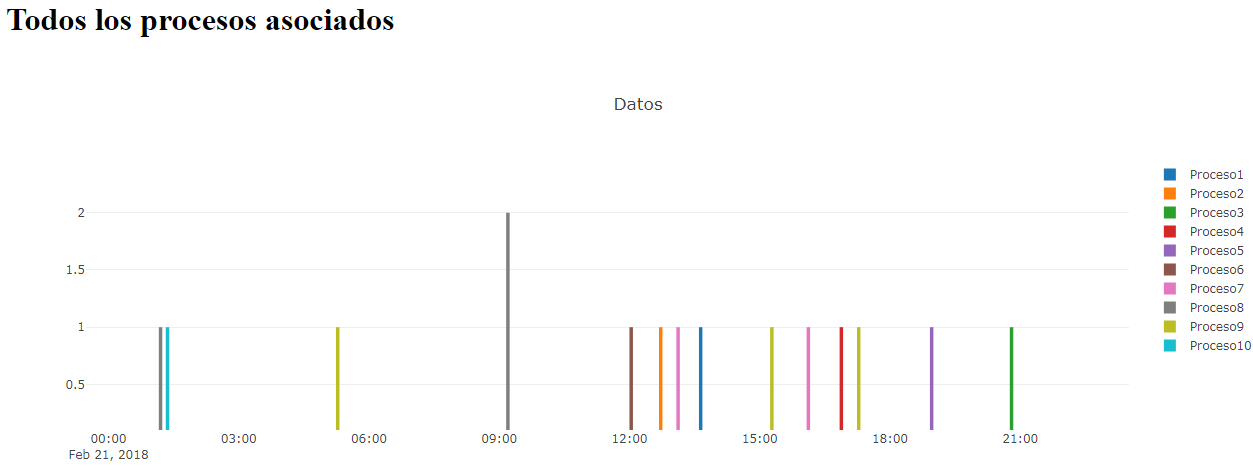

In [22]:
Image(filename= '8a.png', width=950)

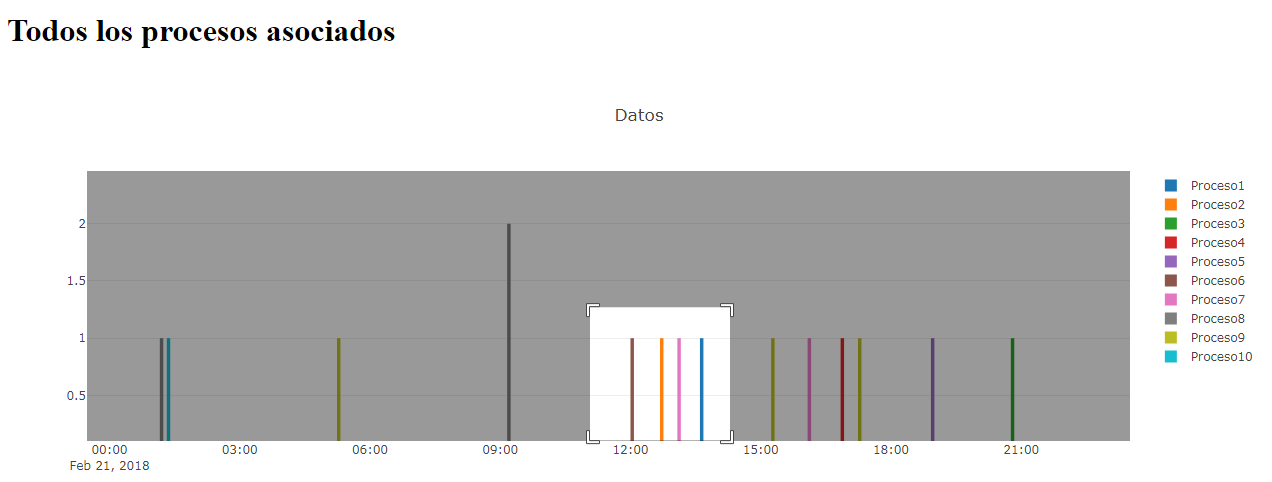

In [23]:
Image(filename= '9a.png', width=950)

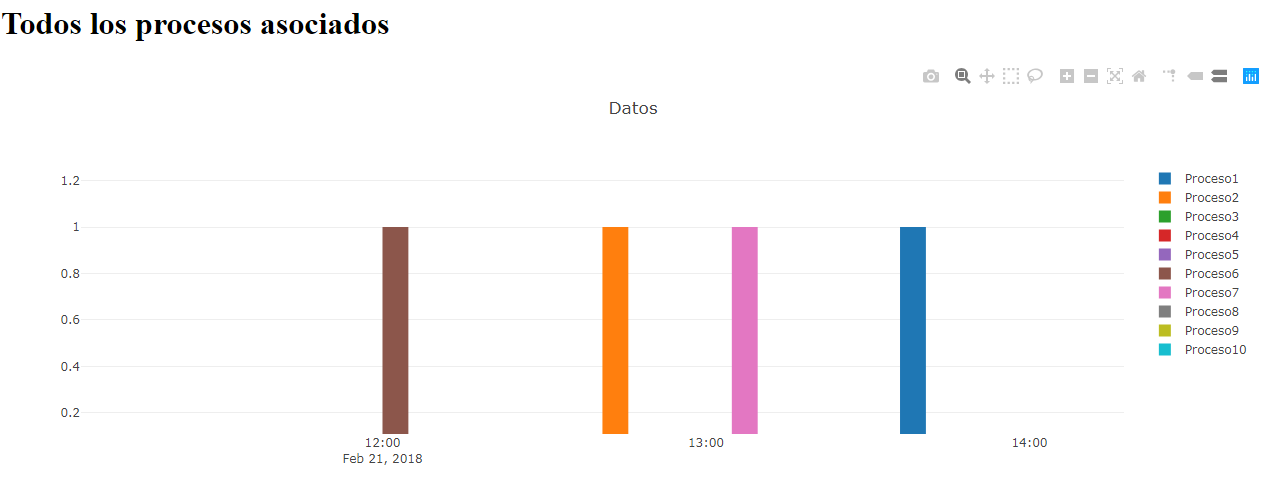

In [24]:
Image(filename= '10a.png', width=950)

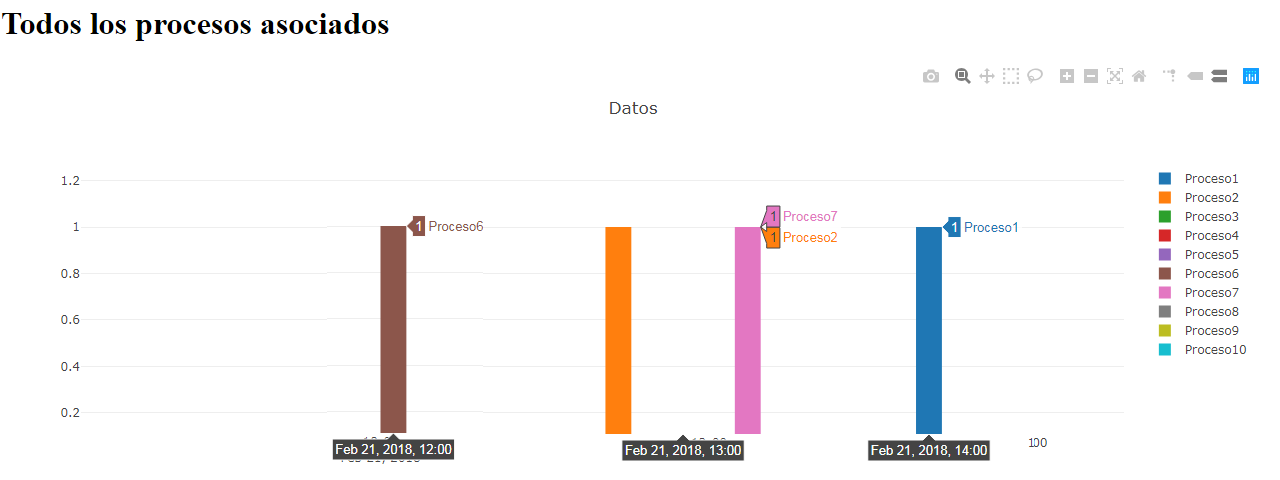

In [25]:
Image(filename= '11a.png', width=950)

### Ahora que ya se que la funcion y la grafica funcionan, en vez de generar aleatoriamente los datos del dataframe que nutren al sistema podria traerlos desde mi base de datos y solo tendria que armar la consulta de tal forma q a result lo pueda llenar con el mismo formato que acepta el script que crea la info que rellena la grafica o sea:

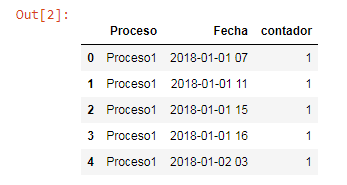

In [27]:
Image(filename= '13a.png', width=350)

### La consulta tendria que taerme la entidad, las fechas con distinct y agruparlas para poder tener una tercer columna con un count del total de veces que se repitio esa fecha para esa entidad. Para usarlo tendria que hacer lo siguiente:

In [ ]:
import MySQLdb
import pandas.io.sql as psql
import matplotlib.pyplot as plt

db=MySQLdb.connect(host='Aca va el host', user='Aca va el usuario', passwd='Aca va la contraseña', db='Ca va el nombre de la BD')
query = "Aca va la consulta para obtener los datos que se van a usar"
result = psql.read_sql(query, con=db)
db.close()